In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('stress_detection.csv')

In [3]:
df.head()

,participant_id,day,PSS_score,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,sleep_time,wake_time,sleep_duration,PSQI_score,call_duration,num_calls,num_sms,screen_on_time,skin_conductance,accelerometer,mobility_radius,mobility_distance
0,1,1,34,2.322732,4.332193,1.185878,1.570213,3.782094,7.726792,5.190660,6.572069,1,3.924527,12,32,10.703714,3.115730,0.161717,1.145179,2.196851
1,1,2,37,1.761436,3.254120,3.907281,4.072512,1.997145,7.312674,6.170717,8.030168,4,58.318004,3,41,11.012939,0.959144,0.985587,1.021133,0.737825
2,1,3,30,3.025887,1.855002,2.045900,2.317493,3.619225,6.992060,5.318825,7.102420,1,4.941043,4,48,4.877372,3.311629,1.877445,0.478179,0.911673
3,1,4,16,1.948370,4.966676,3.345225,1.607756,3.583524,8.886914,8.061075,8.123294,3,0.295373,11,38,3.462956,0.625721,0.494921,0.630549,3.911418
4,1,5,32,3.343484,2.065936,3.137843,2.118061,2.567347,7.811705,7.312145,7.785143,3,22.300571,17,17,4.861046,0.622609,1.342600,0.254090,1.605132


In [15]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load SWELL dataset
data = pd.read_csv('train.csv')
data['condition']

0            no stress
1         interruption
2         interruption
3            no stress
4            no stress
              ...     
369284       no stress
369285       no stress
369286       no stress
369287       no stress
369288       no stress
Name: condition, Length: 369289, dtype: object

In [16]:
# Load train and test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Separate features and target
X_train = train_data.drop(['condition', 'datasetId'], axis=1)
y_train = train_data['condition']
X_test = test_data.drop(['condition', 'datasetId'], axis=1)
y_test = test_data['condition']

# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[ 0.30904143,  0.08916087,  0.41002947, ..., -0.67275865,
         0.37334785, -0.30240555],
       [ 0.74456201,  0.80404558, -0.36353616, ..., -0.92307306,
         0.54119807, -1.56903886],
       [ 0.41359844,  0.49153993, -0.32230664, ..., -0.76971081,
         0.35207093, -0.09611535],
       ...,
       [ 1.43534642,  1.38302122, -0.18210442, ..., -0.94848808,
         0.73996194, -0.67629604],
       [-0.38944985, -0.29025121, -0.40072444, ..., -0.24349624,
         0.1408559 , -0.00571249],
       [-0.25858914, -0.20244055, -0.5401557 , ..., -0.26188235,
         0.70397363,  0.83281311]])

In [13]:
# Train XGBoost model
model = XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',
    random_state=42
)

In [17]:
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     11782
           1       0.98      1.00      0.99     22158
           2       0.99      0.98      0.98      7093

    accuracy                           0.99     41033
   macro avg       0.99      0.98      0.99     41033
weighted avg       0.99      0.99      0.99     41033


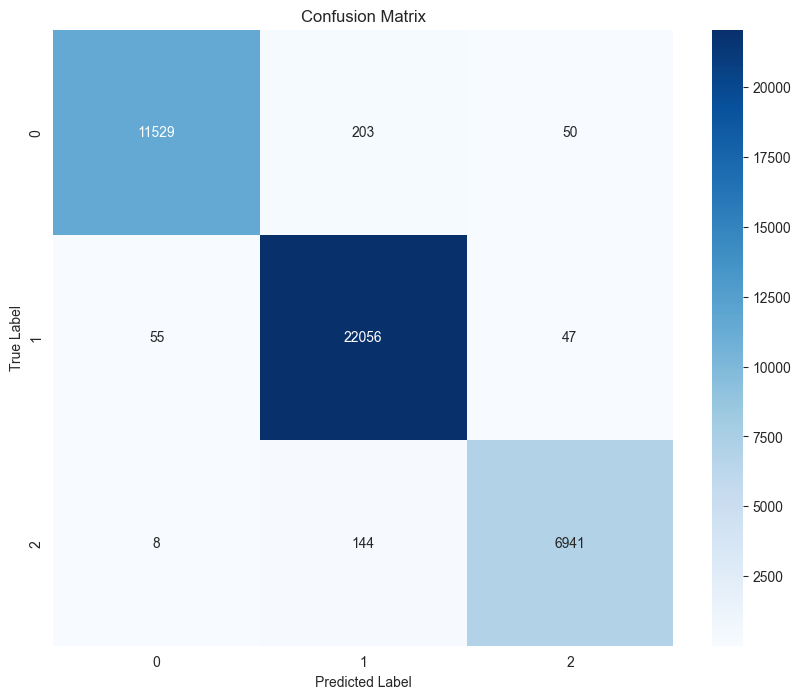


Top 10 Important Features:
          feature  importance
31          HF_LF    0.079879
6              HR    0.072772
7           pNN25    0.043097
10            SD2    0.039257
14  MEDIAN_REL_RR    0.036456
27         HF_PCT    0.036265
4            SDSD    0.035536
1       MEDIAN_RR    0.035192
29             TP    0.034056
23             LF    0.032934


In [18]:
# Make predictions and evaluate
y_pred = model.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
print("\nTop 10 Important Features:")
print(feature_importance.head(10))

In [25]:
# Load data
from xgboost import XGBRegressor

data = pd.read_csv('stress_detection.csv', skiprows=1, header=None)  # Skip header row
X = data.drop(columns=[2])  # Drop PSS_score column
y = data[2]  # PSS_score column

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = XGBRegressor(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# Evaluate with regression metrics
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test_scaled)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': [f'Feature_{i}' for i in range(X.shape[1])],
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
print("\nTop 10 Important Features:")
print(feature_importance.head(10))

RMSE: 8.634794344712981
R2 Score: -0.05728408076414171

Top 10 Important Features:
       feature  importance
14  Feature_14    0.064823
9    Feature_9    0.059539
15  Feature_15    0.059301
17  Feature_17    0.058283
11  Feature_11    0.058049
7    Feature_7    0.057897
16  Feature_16    0.056903
18  Feature_18    0.056538
12  Feature_12    0.056125
5    Feature_5    0.055592


In [20]:
X_train

,0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
700,24,10,3.113322027,1.696272611,2.149447896,2.93675355,3.231972868,5.795282187,5.383591491,8.256840006,2,8.672701948,2,25,1.311283354,2.326536805,0.38620677,0.620774261,3.866265914
226,8,16,3.223773482,1.447728216,3.785424247,2.472640843,1.835241866,6.333718109,5.525123574,7.498682405,4,54.18465959,15,32,2.938070407,4.549555082,1.192996069,1.158386078,0.780193946
1697,57,17,4.954580381,1.629318865,1.691266249,2.274107163,3.791837964,6.099924946,6.962894733,6.422528337,4,38.219016,9,0,4.050605921,4.137093865,1.919329195,0.433854134,1.297203475
1010,34,20,3.379184783,3.232057635,4.002714189,4.019821423,2.915855527,6.587542682,8.429951295,8.266764633,3,52.98947684,12,24,7.061120884,3.447035111,1.642794555,0.859069733,1.685212403
1572,53,12,3.750308255,1.37480466,2.535557617,4.325785315,1.979645396,7.44493988,7.421476632,7.271671542,4,29.87617298,14,39,1.204168839,2.938927295,0.584730024,0.804807229,2.419041111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,55,18,2.502803838,1.536011556,3.06061877,3.98654581,1.884305781,6.791659448,7.242508269,8.239988544,3,18.07446286,19,2,6.061576167,4.660806604,0.451893012,0.274839056,3.16046819
1095,37,15,2.464203583,3.925254434,2.435725617,3.884898986,3.38367077,7.600720415,8.535551997,7.394922958,2,19.03391394,14,32,7.486315056,4.552906193,0.980618179,1.242259638,4.555926471
1130,38,20,3.370388665,3.940080804,3.932316906,2.670797751,2.206598547,6.984798983,8.947025348,8.461584444,2,0.579233531,5,18,3.10271264,2.244798768,0.459959163,1.453678886,3.909384305
1294,44,4,4.11115978,1.809274718,4.816831511,3.838151254,4.776670438,7.255908168,8.143339618,8.194082253,1,43.69821797,12,10,3.348135174,4.90840557,1.897266838,0.691842723,1.885321455
